In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Fossil Watch Flow Chart

In [80]:
df_watch_chart = pd.read_excel('data/FOSSIL WATCH FLOW CHART 0416.xlsx',header=1)

In [82]:
df_watch_chart.drop(columns=['IMAGE','MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC','Unnamed: 16','Unnamed: 29'],index=0,inplace=True)

In [83]:
df_watch_chart.columns = df_watch_chart.columns.astype(str).str.strip().str.lower().str.replace(' ','_')

In [84]:
df_watch_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 1 to 1590
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   style              1589 non-null   object 
 1   retail             1588 non-null   float64
 2   upc                1589 non-null   float64
 3   description        1589 non-null   object 
 4   collection         1587 non-null   object 
 5   size               1587 non-null   object 
 6   gender             1589 non-null   object 
 7   status             1259 non-null   object 
 8   2015               1489 non-null   float64
 9   2016               1489 non-null   float64
 10  2017               1489 non-null   float64
 11  2018               1489 non-null   float64
 12  2019               1582 non-null   float64
 13  2020               1589 non-null   float64
 14  2021               1589 non-null   float64
 15  jan                1589 non-null   float64
 16  feb                1589 

In [108]:
df_watch_chart[df_watch_chart['collection'].isna()]

,style,retail,upc,description,collection,size,gender,status,2015,2016,...,2020,2021,jan,feb,mar,apr,so,total_sales_2022,oh,monthly_avrg_2022
646,FS5697,169.0,7.964835e+11,FOSSIL / MENS / FORRESTER CHRONO 46MM,NaN,NaN,MENS,2020H1,0.0,0.0,...,14.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
786,LE1095,119.0,7.964835e+11,FOSSIL / LADIES / JACQUELINE 36MM,NaN,NaN,LADIES,2020H1,0.0,0.0,...,5.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0,0.25
899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_watch_chart.describe().round(1)

,retail,upc,2015,2016,2017,2018,2019,2020,2021,jan,feb,mar,apr,so,total_sales_2022,oh,monthly_avrg_2022
count,1588.0,1.589000e+03,1489.0,1489.0,1489.0,1489.0,1582.0,1589.0,1589.0,1589.0,1589.0,1589.0,1589.0,1589.0,1589.0,1589.0,1589.0
mean,143.5,7.974690e+11,5.0,13.3,22.8,27.1,17.0,10.7,12.4,1.3,1.0,1.5,0.6,0.4,4.4,5.8,1.1
std,32.6,1.441317e+11,16.0,33.3,46.6,70.5,47.9,23.9,25.5,3.7,3.0,4.4,2.7,1.4,11.1,14.0,2.8
min,75.0,7.964834e+10,0.0,0.0,-1.0,-2.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,125.0,7.964833e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,139.0,7.964834e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,155.0,7.964835e+11,0.0,6.0,30.0,14.0,6.0,10.0,14.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.5
max,325.0,4.053859e+12,112.0,266.0,619.0,764.0,702.0,197.0,260.0,39.0,31.0,45.0,44.0,15.0,116.0,158.0,29.0


In [86]:
df_watch_chart[df_watch_chart['oh']>0]

,style,retail,upc,description,collection,size,gender,status,2015,2016,...,2020,2021,jan,feb,mar,apr,so,total_sales_2022,oh,monthly_avrg_2022
19,CE1093,249.0,7.964835e+11,FOSSIL / LADIES / CARLIE 38MM,CARLIE,38MM,LADIES,2020H1,0.0,0.0,...,50.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
24,CE1107,219.0,7.964835e+11,FOSSIL / LADIES / FB-01 35MM,FB-01,35MM,LADIES,NaN,0.0,0.0,...,0.0,19.0,11.0,6.0,5.0,7.0,4.0,29.0,12.0,7.25
25,CE1108,219.0,7.964835e+11,FOSSIL / LADIES / FB-01 35MM,FB-01,35MM,LADIES,NaN,0.0,0.0,...,0.0,16.0,5.0,0.0,2.0,3.0,3.0,10.0,17.0,2.50
26,CE1110,219.0,7.964835e+11,FOSSIL / LADIES / GABBY 34MM,GABBY,34MM,LADIES,2021H3,NaN,NaN,...,0.0,0.0,8.0,3.0,7.0,3.0,1.0,21.0,3.0,5.25
27,CE1112,219.0,7.964835e+11,FOSSIL / LADIES / STELLA 38MM,STELLA,38MM,LADIES,2021H3,NaN,NaN,...,0.0,0.0,8.0,3.0,7.0,1.0,3.0,19.0,8.0,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,ES5192,170.0,7.964836e+11,FOSSIL / LADIES / STELLA 37MM,STELLA,37MM,LADIES,2022H2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.00
898,FS5924,140.0,7.964836e+11,FOSSIL / GENTS / DAYLINER 42MM,DAYLINER,42MM,GENTS,2022H2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.00
958,ME3177,219.0,7.964835e+11,FOSSIL / LADIES / CARLIE 35MM,CARLIE,35MM,LADIES,DISCD,0.0,0.0,...,5.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,5.0,0.75
1020,FS4812,129.0,7.964830e+11,FOSSIL / MENS / GRANT,GRANT,44MM,MEN,DISCD,38.0,105.0,...,0.0,1.0,5.0,3.0,10.0,0.0,2.0,18.0,19.0,4.50


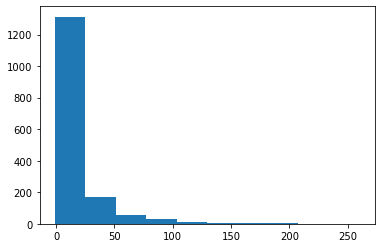

In [96]:
plt.hist(x=df_watch_chart['2021']);

In [98]:
df_watch_chart.columns


Index(['style', 'retail', 'upc', 'description', 'collection', 'size', 'gender',
       'status', '2015', '2016', '2017', '2018', '2019', '2020', '2021', 'jan',
       'feb', 'mar', 'apr', 'so', 'total_sales_2022', 'oh',
       'monthly_avrg_2022'],
      dtype='object')

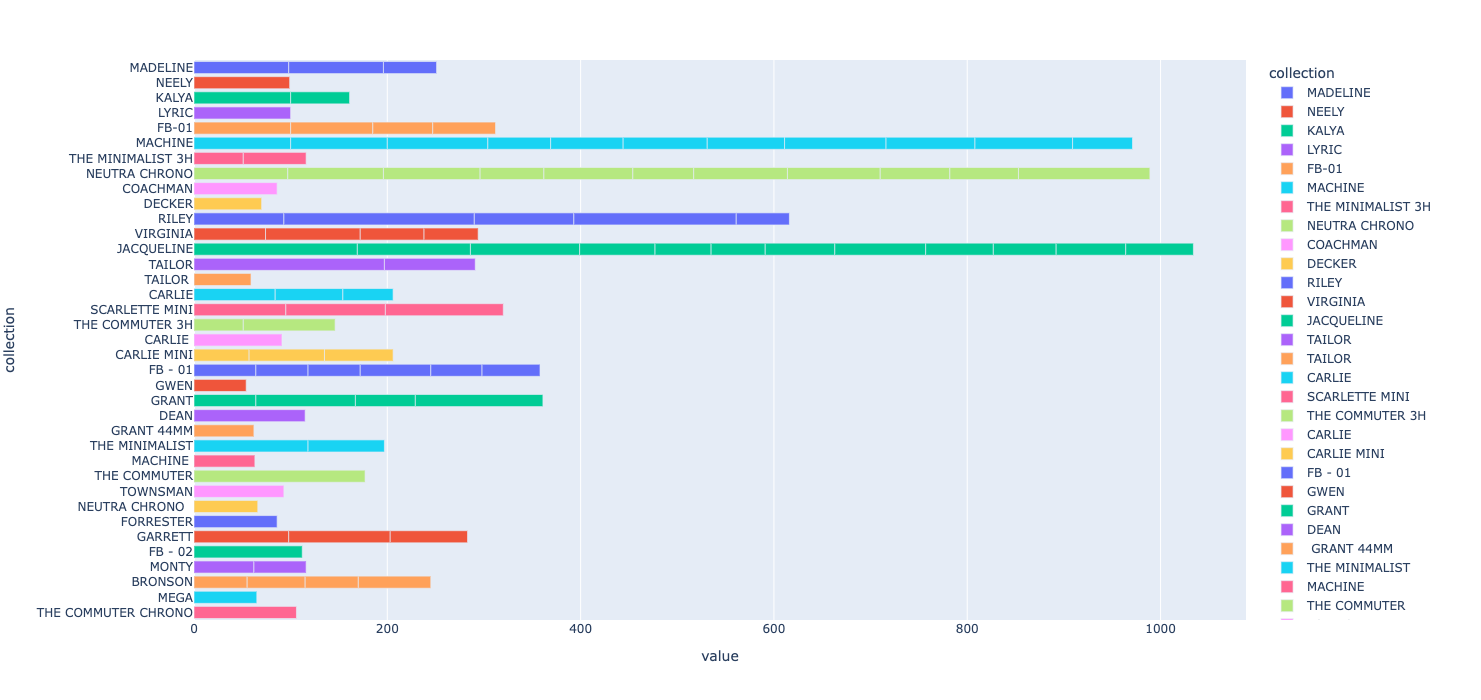

In [181]:
px.bar(df_watch_chart[ df_watch_chart['2020'] > 50 ].dropna(subset='collection'), y='collection',x=['2020'],color='collection',orientation='h',height=700)

# Fossil Proposal

In [149]:
df_proposal = pd.read_excel('data/FOSSIL  PROPOSAL APRIL 16.xlsx')

In [155]:
df_proposal.drop(columns=['IMAGE','Unnamed: 12','Unnamed: 14','Unnamed: 17'],inplace=True)

In [162]:
df_proposal.dropna(subset='Material',inplace=True)

In [163]:
df_proposal.columns

Index(['Material', 'UPC', 'STATUS', 'RETAIL', 'GENDER', 'COLLECTION', 'CASE',
       'INVENTORY', 'QTY OH', 'QTY OOR', 'TOTAL', 'ORDER', 'SOLD LAST 6M',
       'AVERAGE/MO', 'MONTHS/SUP', 'WHOLESALE', 'COST', 'EXT COST'],
      dtype='object')

In [169]:
df_proposal[df_proposal['MONTHS/SUP'].isna()]

,Material,UPC,STATUS,RETAIL,GENDER,COLLECTION,CASE,INVENTORY,QTY OH,QTY OOR,TOTAL,ORDER,SOLD LAST 6M,AVERAGE/MO,MONTHS/SUP,WHOLESALE,COST,EXT COST
87,ES5168,7.964836e+11,2022H1,140.0,WOMEN,JACQUELINE,36MM,Available,20.0,0,20.0,0.0,0,0.0,NaN,70.0,49.0,0.0
89,ES5176SET,7.964836e+11,2022H1,260.0,WOMEN,ADDISON,30MM,Available,40.0,0,40.0,0.0,0,0.0,NaN,130.0,91.0,0.0
90,ES5183SET,7.964836e+11,2022H2,140.0,WOMEN,CARLIE,28MM,Available,0.0,0,0.0,40.0,0,0.0,NaN,70.0,49.0,1960.0
91,ES5184,7.964836e+11,2022H2,120.0,WOMEN,SCARLETTE,32MM,Available,30.0,20,50.0,0.0,0,0.0,NaN,60.0,42.0,0.0
92,ES5187,7.964836e+11,2022H2,120.0,WOMEN,CARLIE,35MM,Available,0.0,20,20.0,0.0,0,0.0,NaN,60.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,ME3202,7.964835e+11,C,240.0,MEN,INSCRIPTION,42MM,Delivery within 6 weeks,0.0,10,10.0,0.0,0,0.0,NaN,120.0,84.0,0.0
290,ME3203,7.964835e+11,C,260.0,MEN,INSCRIPTION,42MM,Delivery within 6 weeks,0.0,10,10.0,0.0,0,0.0,NaN,130.0,91.0,0.0
291,ME3204,7.964835e+11,C,260.0,MEN,INSCRIPTION,42MM,Delivery within 6 weeks,0.0,15,15.0,0.0,0,0.0,NaN,130.0,91.0,0.0
292,ME3205,7.964835e+11,C,240.0,MEN,INSCRIPTION,42MM,Delivery within 6 weeks,0.0,15,15.0,0.0,0,0.0,NaN,120.0,84.0,0.0


In [168]:
df_proposal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Material      300 non-null    object 
 1   UPC           300 non-null    float64
 2   STATUS        300 non-null    object 
 3   RETAIL        300 non-null    float64
 4   GENDER        300 non-null    object 
 5   COLLECTION    300 non-null    object 
 6   CASE          300 non-null    object 
 7   INVENTORY     300 non-null    object 
 8   QTY OH        300 non-null    float64
 9   QTY OOR       300 non-null    object 
 10  TOTAL         300 non-null    float64
 11  ORDER         300 non-null    float64
 12  SOLD LAST 6M  300 non-null    object 
 13  AVERAGE/MO    300 non-null    float64
 14  MONTHS/SUP    216 non-null    object 
 15  WHOLESALE     300 non-null    float64
 16  COST          300 non-null    float64
 17  EXT COST      300 non-null    float64
dtypes: float64(9), object(9)
memor